In [1]:
class Particle:
    def __init__(self, x, y, r, vx, vy):
        self.__x = x
        self.__y = y
        self.__r = r
        self.__vx = vx
        self.__vy = vy

    def get_x(self):
        return self.__x

    def get_y(self):
        return self.__y

    def get_r(self):
        return self.__r
    
    def get_vx(self):
        return self.__vx
    
    def get_vy(self):
        return self.__vy

    def set_x(self, x):
        self.__x = x

    def set_y(self, y):
        self.__y = y
        
    def set_vx(self, vx):
        self.__vx = vx
        
    def set_vy(self, vy):
        self.__vy = vy

In [9]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation


class RectangularScene:
    def __init__(self, X, Y, n, time_step, r):
        self.__X = X
        self.__Y = Y
        self.__n = n
        self.__r = r
        self.__time_step = time_step
        self.__particles = []
        for i in range(n):
            position = np.random.random((1, 2))
            self.__particles.append(Particle(position[0][0] * X,
                                             position[0][1] * Y,
                                             r,
                                             random.uniform(0, min(X, Y)),
                                             random.uniform(0, min(X, Y))))

    def __move(self):
        for i, particle in enumerate(self.__particles):
            x, y = particle.get_x(), particle.get_y()
            vx, vy = particle.get_vx(), particle.get_vy()
            r = particle.get_r()
            x_next = x + vx * self.__time_step
            y_next = y + vy * self.__time_step
            if x_next + r >= self.__X or x_next - r <= 0:
                self.__particles[i].set_vx(-vx)
            if y_next + r >= self.__Y or y_next - r <= 0:
                self.__particles[i].set_vy(-vy)
            self.__particles[i].set_x(x + self.__particles[i].get_vx() * self.__time_step)
            self.__particles[i].set_y(y + self.__particles[i].get_vy() * self.__time_step)
                
    def __init(self):
        self.__rect.set_edgecolor('none')
        self.__p.set_data([], [])
        return self.__p, self.__rect

    def __animate(self, i):
        self.__move()
        ms = int(self.__fig.dpi * 2 * self.__r * self.__fig.get_figwidth() / np.diff(self.__ax.get_xbound())[0])
        self.__rect.set_edgecolor('k')
        self.__p.set_data([x.get_x() for x in self.__particles], [x.get_y() for x in self.__particles])
        self.__p.set_markersize(ms)
        return self.__p, self.__rect

    def run(self):
        try:
            self.__fig = plt.figure()
            self.__fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
            self.__ax = self.__fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(0, self.__X),
                                               ylim=(0, self.__Y))
            self.__p, = self.__ax.plot([], [], 'bo', ms=6)
            self.__rect = plt.Rectangle((0., 0.), self.__X, self.__Y, ec='none', lw=2, fc='none')
            self.__ax.add_patch(self.__rect)
            
            ani = animation.FuncAnimation(self.__fig, self.__animate, frames=300, init_func=self.__init, blit=True)
            ani.save('animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])            
        except Exception as e:
            print(e)

    def get_particles(self):
        return self.__particles

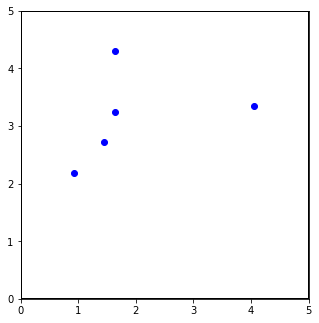

In [11]:
scene = RectangularScene(X=5, Y=5, n=5, time_step=1. / 30, r=0.04)
scene.run()